# Time Series Analysis on the Power Consumption data
Some basic steps involved in TSA:
1. detrend the data - most statistical algorithms want there to be a well-defined mean and variance.
2. remove seasonality - summer/winter, holidays, electrical pulses to the heart, and so on.
3. remove “cycles".

### importing the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
# load DATA:- The data is loaded from the UCI machine learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv"
data = pd.read_csv(url)

#### Reading the data in a way to manipulate the timeseries

In [4]:
data_RS = pd.read_csv(url, parse_dates=['DateTime'], index_col=['DateTime'])

### Visualizing some features in the dataset


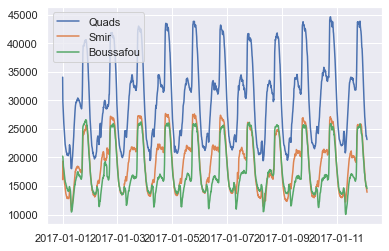

In [5]:
# Plotting the data
plt.plot(data_RS['Zone 1 Power Consumption'][:1600], label='Quads')
plt.plot(data_RS['Zone 2  Power Consumption'][:1600], label='Smir')
plt.plot(data_RS['Zone 3  Power Consumption'][:1600], label='Boussafou')
plt.legend()

## Confirming of our data can be transformed into stationary data

#### Applying the Adfuller test

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
results = adfuller(data_RS['Temperature'])
print(results)

(-9.459827585705556, 4.3841857278094625e-16, 58, 52357, {'1%': -3.4304749044184266, '5%': -2.861595205242518, '10%': -2.566799383915253}, -27314.12577202708)


### Proof that shows that the dataset is statistic
- The 0th element is test statistic
    - More negative means more likely to be stationary (In our case its -9.45.
- The 1st element is the p-value:
    - Since the p-value is greater than alpha=0.05, we reject the null (non-stationary) and accept that the data must be stationary.

### There are several ways to make a time-series stationary (de-trending)
- A common way is **taking the difference** between the present and previous.

**Note:** It's imperative to import the data using the parse_dates format on the 3rd code cell.


In [8]:
df_stationary = data_RS.diff().dropna()
df_stationary

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:10:00,-0.145,0.7,0.000,0.019,-0.034,-4241.01266,3246.20061,-109.87952
2017-01-01 00:20:00,-0.101,0.0,-0.003,-0.008,0.015,-686.58227,-368.38906,-462.65061
2017-01-01 00:30:00,-0.192,0.5,0.003,0.029,-0.004,-899.24051,-645.59271,-769.15662
2017-01-01 00:40:00,-0.200,0.7,-0.002,-0.043,-0.011,-893.16456,-488.75379,-456.86747
2017-01-01 00:50:00,-0.068,1.2,0.000,0.011,0.023,-710.88607,-455.92706,-312.28916
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,-0.060,-0.1,0.000,-0.019,0.003,-997.71863,-416.07855,-207.44298
2017-12-30 23:20:00,-0.063,0.2,0.002,0.011,-0.003,-730.03802,-732.74011,-351.50060
2017-12-30 23:30:00,-0.047,0.2,0.004,0.033,-0.019,-839.54373,-846.88555,-622.32893


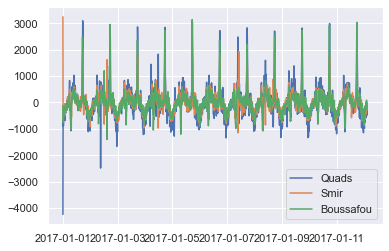

In [9]:
# Plotting the data
plt.plot(df_stationary['Zone 1 Power Consumption'][:1600], label='Quads')
plt.plot(df_stationary['Zone 2  Power Consumption'][:1600], label='Smir')
plt.plot(df_stationary['Zone 3  Power Consumption'][:1600], label='Boussafou')
plt.legend()

For this time series, just taking the time series for the first time was good enough. Mosttimes, we will need to take the difference more than once.

Other form of transformation includes:
- Taking the log
    - np.log(df)
- Taking the square root
    - np.sqrt(df)
- Taking the proportional change
    - df.shift(1)/df


### Transformation of the data using MinMaxScaler class

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
trans = scaler.fit_transform(df_stationary)

# We initialize another instances of the MinMaxScaler for the target
MM_scaler = MinMaxScaler(feature_range=(0, 1))
MM_scaler.fit_transform(df_stationary[['Zone 1 Power Consumption']])

array([[0.52910283],
       [0.65361963],
       [0.64616991],
       ...,
       [0.64826117],
       [0.65550722],
       [0.65635969]])

In [11]:
# restoring the dataframe
df_trans = pd.DataFrame(trans, columns=df_stationary.columns)
df_trans.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,0.287386,0.649874,0.493151,0.471367,0.511870,0.529103,0.895532,0.432110
1,0.291862,0.635118,0.492837,0.471345,0.511919,0.653620,0.602848,0.404453
2,0.282604,0.645658,0.493464,0.471375,0.511900,0.646170,0.580402,0.380423
3,0.281790,0.649874,0.492942,0.471316,0.511893,0.646383,0.593102,0.404906
4,0.295219,0.660413,0.493151,0.471360,0.511926,0.652768,0.595760,0.416241


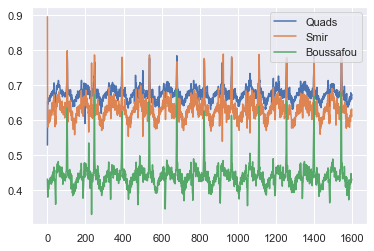

In [12]:
# Plotting the data
plt.plot(df_trans['Zone 1 Power Consumption'][:1600], label='Quads')
plt.plot(df_trans['Zone 2  Power Consumption'][:1600], label='Smir')
plt.plot(df_trans['Zone 3  Power Consumption'][:1600], label='Boussafou')
plt.legend()

### If we were to aggregate the three power consumption what do we get?

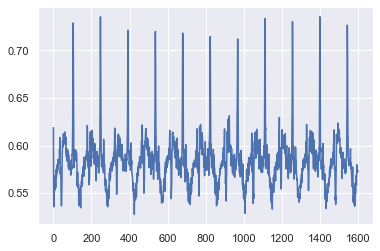

In [13]:
plt.plot(trans[:, -3:].mean(axis=1)[:1600])

### Detrending using LOESS
- Short for locally estimated scatterplot smoothing.

In [14]:
from statsmodels.tsa.seasonal import STL

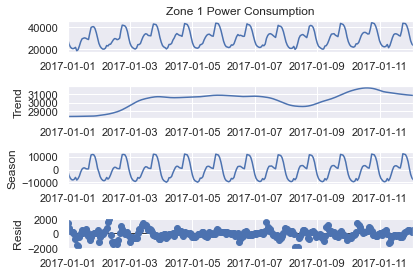

In [15]:
# comparing to see the relationship between the first 1600 observations
data = data_RS['Zone 1 Power Consumption'][:1600]
data = data.resample('1H').mean().ffill()
stl = STL(data).fit()
stl.plot()
plt.show()

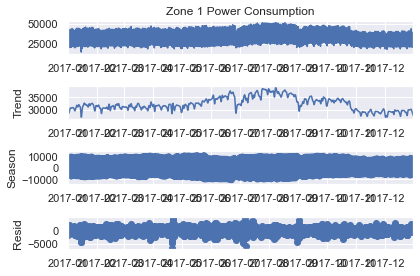

In [16]:
# using the Savitsky-Golay Filter
data = data_RS['Zone 1 Power Consumption']
data = data.resample('1H').mean().ffill()
stl = STL(data).fit()
stl.plot()
plt.show()

## Running Deep Learning Model on the data

Somw useful terminologies include:
- RNN: Recurrent neural network, These are a powerful set of artificial neural network algorithms especially useful for processing sequential data such as sound, time series (sensor) data or written natural language.
- LSTM: Long Short-Term Memory, These are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.
    - LSTM is used to solve the problem of the vanishing gradient. It is useful for sensor data and time series.

In [27]:
trans.shape

(52415, 8)

In [28]:
52415*.8

41932.0

In [29]:
trans[:, -3:].mean(axis=1)

array([0.61891488, 0.55364018, 0.53566504, ..., 0.53476607, 0.55282107,
       0.55502675])

In [17]:
# Creating four datasets using the transformed data
features = trans[:, :5]
quad = trans[:, 5]
smir = trans[:, 6]
bous = trans[:, 7]

# adding the aggregated data
agg = trans[:, -3:].mean(axis=1)
# agg =  np.append(trans[:, :5], y_agg.reshape(-1, 1), axis=1)

#### Confirmation of adding the aggregate with previous cell code.

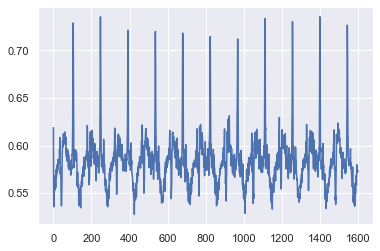

In [18]:
plt.plot(agg[:1600])

#### Here, we can split the dataset Into training and test dataset

In [19]:
from sklearn.model_selection import train_test_split 

start_state = 42  # This is like the random seed
test_fraction = 0.2  # This is the proportion of the train (80%) and the test (20%) dataset

X_trainQ, X_testQ, y_trainQ, y_testQ = train_test_split(features, quad, test_size=test_fraction, random_state=start_state)
X_trainS, X_testS, y_trainS, y_testS = train_test_split(features, smir, test_size=test_fraction, random_state=start_state)
X_trainB, X_testB, y_trainB, y_testB = train_test_split(features, bous, test_size=test_fraction, random_state=start_state)

### LSTM have 3D inputs.
Hence, we have to transform the dataset in the three dimensional inputs. The LSTM 3D include: [samples, time steps, features]

In [20]:
# past_steps: The number of features for a given label
past_steps = features.shape[1]

In [21]:
trainX = np.reshape(X_trainQ, (X_trainQ.shape[0], 1, X_trainQ.shape[1]))
testX = np.reshape(X_testQ, (X_testQ.shape[0], 1, X_testQ.shape[1]))

In [22]:
trainX[0, :]

array([[0.35096643, 0.62247049, 0.49273241, 0.49778362, 0.54258392]])

In [23]:
trainX.shape

(41932, 1, 5)

In [24]:
trainY = y_trainQ
testY = y_testQ

### Training and Fitting the LSTM

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

C:\Users\johns\Anaconda3\envs\deep_learning\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [26]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, past_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=3, batch_size=1, verbose=2)

Epoch 1/3
41932/41932 - 53s - loss: 0.0013 - 53s/epoch - 1ms/step
Epoch 2/3
41932/41932 - 50s - loss: 5.2031e-04 - 50s/epoch - 1ms/step
Epoch 3/3
41932/41932 - 48s - loss: 5.1753e-04 - 48s/epoch - 1ms/step


In [1]:
LSTM?

Object `LSTM` not found.


In [56]:
# Now that the LSTM is trained, 
# we can make predictions using both training and testing data.
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

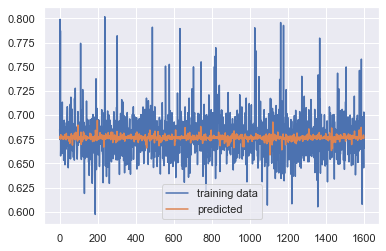

In [59]:
# Plotting the training Data
plt.plot(y_trainQ[:1600], label='training data')
plt.plot(trainPredict[:, 0][:1600], label='predicted')
plt.legend()

In [40]:
# inverting Predictions
trainPredict = MM_scaler.inverse_transform(trainPredict)
trainY = MM_scaler.inverse_transform([trainY])
testPredict = MM_scaler.inverse_transform(testPredict)
testY = MM_scaler.inverse_transform([testY])

# Calculate RMSE
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 630.70 RMSE
Test Score: 626.68 RMSE


### Plotting

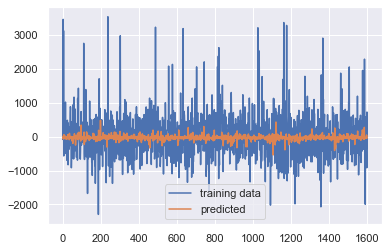

In [53]:
# Plotting the training Data
plt.plot(MM_scaler.inverse_transform(y_trainQ.reshape(-1, 1)[:1600]), label='training data')
plt.plot(trainPredict[:, 0][:1600], label='predicted')
plt.legend()

In [42]:
MM_scaler.inverse_transform(trainY)

array([[  6171583.16354943,  -2383845.64947265,  98853413.08488289, ...,
        -22027391.77300446, -23434120.36904053,  -1435265.01248281]])

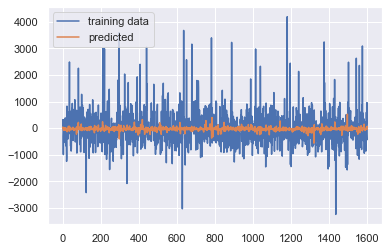

In [54]:
# Plotting the training Data
plt.plot(MM_scaler.inverse_transform(y_testQ.reshape(-1, 1)[:1600]), label='training data')
plt.plot(testPredict[:, 0][:1600], label='predicted')
plt.legend()

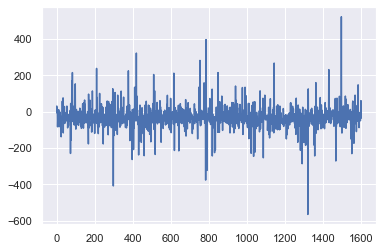

In [55]:
plt.plot(testPredict[:, 0][:1600], label='predicted')

### This inferred we using the Time Series as seen in the Application